In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
years = np.arange(1, 10)
basis = 0
raise_per_year = 2
salaries = basis + years * raise_per_year

print(years)
print(salaries)

data = np.stack([years, salaries])
print(data)

[1 2 3 4 5 6 7 8 9]
[ 2  4  6  8 10 12 14 16 18]
[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]]


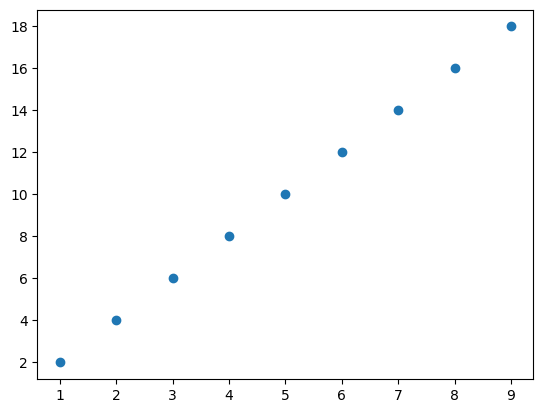

In [3]:
plt.scatter(years, salaries)
plt.show()

In [4]:
def year2salary(year):
    basis = 0
    raise_per_year = 2
    salary = basis + year * raise_per_year
    return salary

In [5]:
salaries_from_function = year2salary(years)
print(salaries_from_function)

[ 2  4  6  8 10 12 14 16 18]


In [6]:
def year2salary_unknown(year, basis, raise_per_year):
    salary = basis + year * raise_per_year
    return salary

In [7]:
basis_guess = 4
raise_guess = 1
salaries_guess = year2salary_unknown(years, basis_guess, raise_guess)
print(salaries_guess)

[ 5  6  7  8  9 10 11 12 13]


In [8]:
error = salaries_guess - salaries
squared_error = error**2
print(error)
print(squared_error)
print(squared_error.sum())

[ 3  2  1  0 -1 -2 -3 -4 -5]
[ 9  4  1  0  1  4  9 16 25]
69


In [9]:
def year2salary_unknown_basis(year, basis):
    raise_per_year = 2
    salary = basis + year * raise_per_year
    return salary

In [10]:
basis_guess = 1
salaries_guess = year2salary_unknown_basis(years, basis_guess)
error = salaries_guess - salaries
squared_error = error**2
print(squared_error.sum())

9


In [11]:
def compute_error(guess, gt):
    error = guess - gt
    squared_error = error**2
    return squared_error.sum()

In [16]:
basis_guess = 1
salaries_guess = year2salary_unknown_basis(years, basis_guess)
error = compute_error(salaries_guess, salaries)
print(error)

9


In [14]:
errors = []
basis_guesses = np.arange(-3, 3)
for basis_guess in basis_guesses:
    salaries_guess = year2salary_unknown_basis(years, basis_guess)
    error = compute_error(salaries_guess, salaries)
    errors.append(error)
print(basis_guesses)
print(errors)

[-3 -2 -1  0  1  2]
[81, 36, 9, 0, 9, 36]


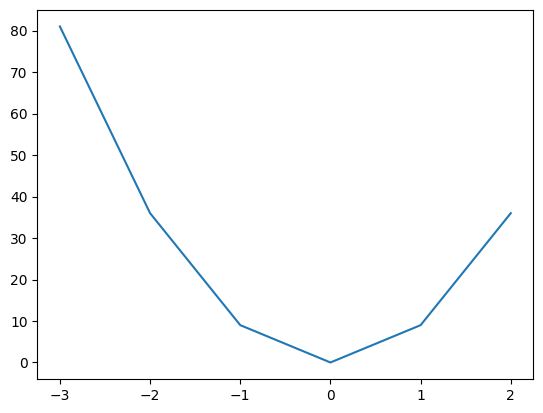

In [15]:
plt.plot(basis_guesses, errors)
plt.show()

In [17]:
def derivative(f, a, eps=1e-4):
    return (f(a + eps) - f(a - eps)) / (eps * 2)

In [18]:
def square(x):
    return x**2

for x_hat in np.arange(-2, 3):
    print(derivative(square, x_hat))

-4.000000000004
-1.9999999999992246
0.0
1.9999999999992246
4.000000000004


In [19]:
def basis2error(basis_guess):
    salaries_guess = year2salary_unknown_basis(years, basis_guess)
    error = compute_error(salaries_guess, salaries)
    return error

In [21]:
print(derivative(basis2error, -1))
print(derivative(basis2error, 0))
print(derivative(basis2error, 1))

-17.99999999995805
-2.2208145085823687e-16
17.99999999995805


In [22]:
a_hat = 1
x = 1
y = 3
y_hat = x * a_hat
error = y_hat - y
L = error ** 2

dLde = 2 * error
dedyh = 1
dLdyh = dLde * dedyh
dyhdah = 1
dLdah = dLdyh * dyhdah

print('dLde', dLde)
print('dLdyh', dLdyh)
print('dLdah', dLdah)

dLde -4
dLdyh -4
dLdah -4


In [23]:
def composite(a_hat):
    x = 1
    y = 3

    y_hat = x * a_hat
    error = y_hat - y
    L = error ** 2

    return L

print(derivative(composite, 1))

-3.9999999999951186
